In [1]:
import numpy as np
import math
import pandas as pd
import networkx as nx
import random
import collections
import matplotlib.pyplot as plt
from FuncionesAuxiliares.FuncionesAuxiliares import *
%matplotlib inline

pd.set_option('display.max_rows',500)
pd.set_option('display.max_columns',500)
pd.set_option('display.width',500)

# Trabajo final para evaluación de Métodos Numéricos de la Mestría de Ciencia de Datos (equipo 3)
* Jorge García (202945)
* Sandra España (203200)
* Aline Pérez (203096)
* Marco Antonio Ramos (142244)

Este trabajo busca implementar un problema de optimización de distancia recorrida en el metro de la CDMX.

# Creación de la matriz de adyacencias para  entre las estaciones del metro

Se obtuvo la base de datos de longitud entre estaciones del metro de la CDMX (long_interestacion) y la longitud de la estación (long_estacion). De la misma manera, se creó una lista con todas las estaciones del metro. Los datos originales se pueden consultar en la siguiente [liga](https://metro.cdmx.gob.mx/longitud-de-estacion)

In [2]:
metro1=pd.read_excel('Data1/distancia_metro.xlsx')
np.set_printoptions(precision=2)
nodos1=list(dict.fromkeys(pd.concat([metro1["Estacion1"],metro1["Estacion2"]])))
N=len(nodos1)

Se creó la matriz de adyacencias, en la cual los nodos son las estaciones y los valores son las distancias en metros

In [3]:
adyacencia1 = construye_matriz_adyacencias("Estacion1","Estacion2","Long_interestacion",N=N,nodos=nodos1,base=metro1)
adyacencia1=np.transpose(adyacencia1)+adyacencia1

In [4]:
adyacencia1

Pantitlan  Zaragoza  GomezFarias  BoulevardPuertoAereo  Balbuena  Moctezuma  SanLazaro  Candelaria  Merced  PinoSuarez  IsabellaCatolica  SaltodelAgua  Balderas  Cuauhtemoc  Insurgentes  Sevilla  Chapultepec  Juanacatlan  Tacubaya  CuatroCaminos  Panteones  Tacuba  Cuitlahuac  Popotla  ColegioMilitar  Normal  SanCosme  Revolucion  Hidalgo  BellasArtes  Allende  Zocalo  SanAntonioAbad  Chabacano  Viaducto   Xola  VilladeCortes  Nativitas  Portales  Ermita  \
Pantitlan                             0.0    1320.0          0.0                   0.0       0.0        0.0        0.0         0.0     0.0         0.0               0.0           0.0       0.0         0.0          0.0      0.0          0.0          0.0       0.0            0.0        0.0     0.0         0.0      0.0             0.0     0.0       0.0         0.0      0.0          0.0      0.0     0.0             0.0        0.0       0.0    0.0            0.0        0.0       0.0     0.0   
Zaragoza                           1320.0       0.0        762.0                   0.0       0.0        0.0        0.0         0.0     0.0         0.0               0.0           0.0       0.0         0.0          0.0      0.0          0.0          0.0       0.0            0.0        0.0     0.0         0.0      0.0             0.0     0.0       0.0         0.0      0.0          0.0      0.0     0.0             0.0        0.0       0.0    0.0            0.0        0.0       0.0     0.0   
GomezFarias                           0.0     762.0          0.0                 611.0       0.0        0.0        0.0         0.0     0.0         0.0               0.0           0.0       0.0         0.0          0.0      0.0          0.0          0.0       0.0            0.0        0.0     0.0         0.0      0.0             0.0     0.0       0.0         0.0      0.0          0.0      0.0     0.0             0.0        0.0       0.0    0.0            0.0        0.0       0.0     0.0   
BoulevardPuertoAereo                  0.0       0.0        611.0                   0.0     595.0        0.0        0.0         0.0     0.0         0.0               0.0           0.0       0.0         0.0          0.0      0.0          0.0          0.0       0.0            0.0        0.0     0.0         0.0      0.0             0.0     0.0       0.0         0.0      0.0          0.0      0.0     0.0             0.0        0.0       0.0    0.0            0.0        0.0       0.0     0.0   
Balbuena                              0.0       0.0          0.0                 595.0       0.0      703.0        0.0         0.0     0.0         0.0               0.0           0.0       0.0         0.0          0.0      0.0          0.0          0.0       0.0            0.0        0.0     0.0         0.0      0.0             0.0     0.0       0.0         0.0      0.0          0.0      0.0     0.0             0.0        0.0       0.0    0.0            0.0        0.0       0.0     0.0   
Moctezuma                             0.0       0.0          0.0                   0.0     703.0        0.0      478.0         0.0     0.0         0.0               0.0           0.0       0.0         0.0          0.0      0.0          0.0          0.0       0.0            0.0        0.0     0.0         0.0      0.0             0.0     0.0       0.0         0.0      0.0          0.0      0.0     0.0             0.0        0.0       0.0    0.0            0.0        0.0       0.0     0.0   
SanLazaro                             0.0       0.0          0.0                   0.0       0.0      478.0        0.0       866.0     0.0         0.0               0.0           0.0       0.0         0.0          0.0      0.0          0.0          0.0       0.0            0.0        0.0     0.0         0.0      0.0             0.0     0.0       0.0         0.0      0.0          0.0      0.0     0.0             0.0        0.0       0.0    0.0            0.0        0.0       0.0     0.0   
Candelaria                            0.0       0.0          0.0                

Verificamos que no haya columnas que no tengan distancias en ninguna de sus entradas

In [5]:
print("máxima distancia por estación\n")
print("\n",np.max(adyacencia1))
print("\nverificamos que no haya un máximo igual a cero (es decir, que todas las estaciones tengan al menos una adyacencia)\n")
print("\n",np.sort(np.max(adyacencia1)))

máxima distancia por estación


 Pantitlan                         1644.0
Zaragoza                          1320.0
GomezFarias                        762.0
BoulevardPuertoAereo               611.0
Balbuena                           703.0
Moctezuma                          703.0
SanLazaro                         1296.0
Candelaria                        1062.0
Merced                             745.0
PinoSuarez                         817.0
IsabellaCatolica                   445.0
SaltodelAgua                       564.0
Balderas                           665.0
Cuauhtemoc                         793.0
Insurgentes                        793.0
Sevilla                            645.0
Chapultepec                        973.0
Juanacatlan                       1158.0
Tacubaya                          1262.0
CuatroCaminos                     1639.0
Panteones                         1639.0
Tacuba                            1433.0
Cuitlahuac                         637.0
Popotla                 

C:\Users\palin\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)


# Creación del grafo de la matriz de adyacencias

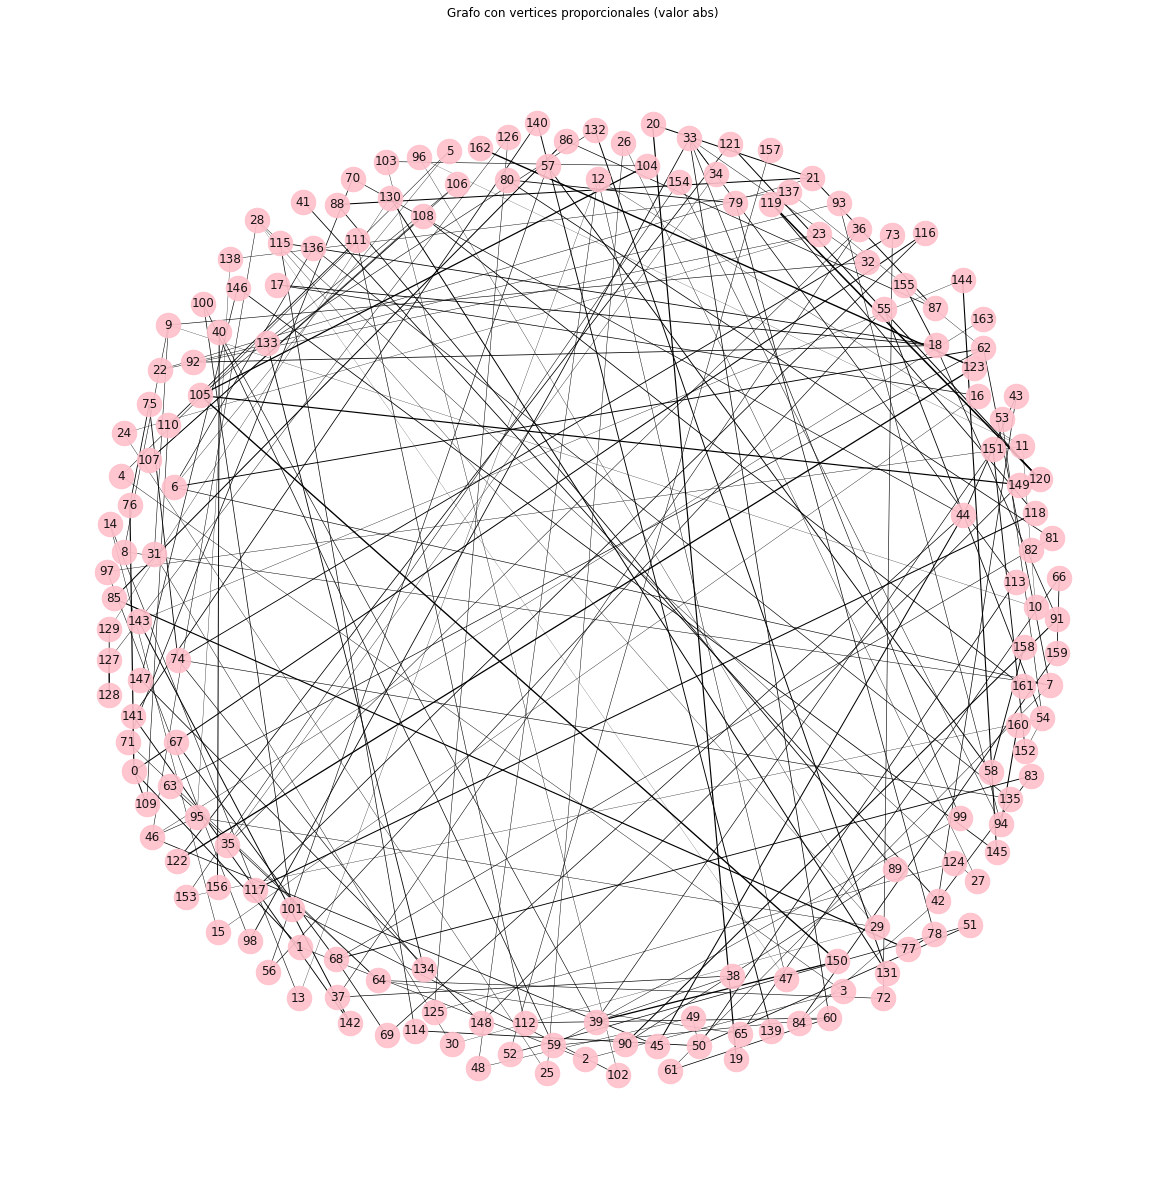

In [6]:
matrix = np.asarray(adyacencia1.values)
names = adyacencia1.index
plot_weighted_graph(matrix)

In [8]:
# plot_labeled_graph(matrix)

# Matriz de afluencia

Como complemento al modelo original y queriendo responder preguntas como: ¿Que ruta es más cómoda en términos de afluencia de personas?, es decir que pasa si como usuario del metro me interesa más que la ruta más corta la ruta más cómoda en términos del número de personas que la transitan. 
<br>
<br>
Bajo este enfoque nos interesa agregar la siguiente base tomada de https://datos.cdmx.gob.mx/dataset/afluencia-diaria-del-metro-cdmx , Esta base muestra la afluencia diaria del Metro CDMX. Los datos se encuentran actualizados al 1 de diciembre de 2022 y su profundidad histórica abarca desde enero 2010 al 31 de octubre 2022. 
<br>
<br>
La base de afluencia desglosada se refiere a la afluencia en el Organismo Público de Transporte STC Metro, separada por medio de acceso, los cuales son: Tarjeta Única de Movilidad Integrada, boleto y gratuidad, esta última se refiere al acceso gratuito para las personas adultos mayores, personas con discapacidad y/o niños menores de 5 años, de acuerdo a los requisitos establecidos por el Organismo.


In [6]:
afluencia = pd.read_csv('Data1/afluenciastc_simple_01_12_2022.csv', encoding='cp1252')
afluencia['fecha']=pd.to_datetime(afluencia['fecha'], format='%d/%m/%Y')
afluencia.head()

fecha  anio    mes    linea             estacion  afluencia
0 2010-01-01  2010  Enero  Linea 1             Zaragoza      20227
1 2010-01-01  2010  Enero  Linea 1  Isabel la CatÃ³lica       6487
2 2010-01-01  2010  Enero  Linea 1            Moctezuma      10304
3 2010-01-01  2010  Enero  Linea 1         Pino SuÃ¡rez       8679
4 2010-01-01  2010  Enero  Linea 1       GÃ³mez FarÃ­as      19499

In [7]:
## Un poco de limpieza a la base para poder hacer los nodos
afluencia['estacion'] = afluencia['estacion'].apply(lambda x: x.replace('Ã³','o').replace('Ã¡','a').replace('Ã\xad','i').replace('Ã±','n')\
 .replace('Ã©','e').replace('Ãº','u').replace('ü¾Œ–˜¼','n').replace('ÃƒÂ©','e')\
 .replace('ÃƒÂ©','o').replace('ÃƒÂ\xad','i').replace('ÃƒÂ³','o').replace('ÃƒÂ¡','a')\
 .replace('ü¾™†”¼','i').replace('ÃƒÂ±','n').replace('ÃƒÂº','u')\
 .replace('á','a').replace('é','e').replace('í','i').replace('ó','o').replace('ú','u')\
 .replace('ñ','n').replace(' ','').replace('-','')\
 .replace('Blvd.PuertoAereo','BoulevardPuertoAereo')\
 .replace('Deptvo.18deMarzo','Deportivo18deMarzo')\
 .replace('Etiopia','Etiopia/PlazadelaTransparencia')\
 .replace('Viveros','Viveros/DerechosHumanos')\
 .replace('MiguelA.deQ.','MiguelangeldeQuevedo')\
 .replace('Inst.delPetroleo','InstitutodelPetroleo')\
 .replace('LaVillaBasilica','LaVilla')\
 .replace('SanPedrolosPinos','SanPedrodelosPinos')\
 .replace('SanJuanLetran','SanJuandeLetran')\
 .replace('BosquedeAragon','BosquesdeAragon')\
 .replace('20deNoviembre','Hospital20deNoviembre'))

afluencia.head()

fecha  anio    mes    linea          estacion  afluencia
0 2010-01-01  2010  Enero  Linea 1          Zaragoza      20227
1 2010-01-01  2010  Enero  Linea 1  IsabellaCatolica       6487
2 2010-01-01  2010  Enero  Linea 1         Moctezuma      10304
3 2010-01-01  2010  Enero  Linea 1        PinoSuarez       8679
4 2010-01-01  2010  Enero  Linea 1       GomezFarias      19499

In [8]:
len(afluencia.estacion.unique())

164

Por ejemplo podemos ver el top 5 de las estaciones con mayor afluencia para el día más reciente en la base '2022-10-31', sin considerar la linea:

In [9]:
afluencia[afluencia['fecha']=='2022-10-31'].groupby(['fecha','estacion'])['afluencia'].sum().sort_values(ascending=False)\
.head(5)

fecha       estacion          
2022-10-31  Pantitlan             159357
            IndiosVerdes          102621
            Constitucionde1917     87075
            Tacubaya               81492
            Tasquena               73599
Name: afluencia, dtype: int64

Ahora observemos el primer lugar de acuerdo a la linea del metro, por ejemplo Pantitlán que tiene varios cruces de lineas

In [10]:
afluencia[(afluencia['fecha']=='2022-10-31')&(afluencia['estacion'].str.contains('Pantitl'))]

fecha  anio      mes    linea   estacion  afluencia
913978 2022-10-31  2022  Octubre  Linea 1  Pantitlan          0
914069 2022-10-31  2022  Octubre  Linea 5  Pantitlan      51160
914124 2022-10-31  2022  Octubre  Linea 9  Pantitlan      61233
914135 2022-10-31  2022  Octubre  Linea A  Pantitlan      46964

In [11]:
afluencia.groupby(['fecha','estacion'])['afluencia'].sum().sort_values(ascending=False)

fecha       estacion             
2012-12-07  Pantitlan                460089
2014-09-09  Pantitlan                448771
2018-10-26  Pantitlan                448747
2018-11-27  Pantitlan                447495
2018-11-30  Pantitlan                446905
                                      ...  
2012-03-12  Hospital20deNoviembre         0
            InsurgentesSur                0
            LomasEstrella                 0
            Mexicaltzingo                 0
2014-04-06  Zapotitlan                    0
Name: afluencia, Length: 763981, dtype: int64

Observemos como se comporta la afluencia de una de las estaciones más caóticas de la CDMX

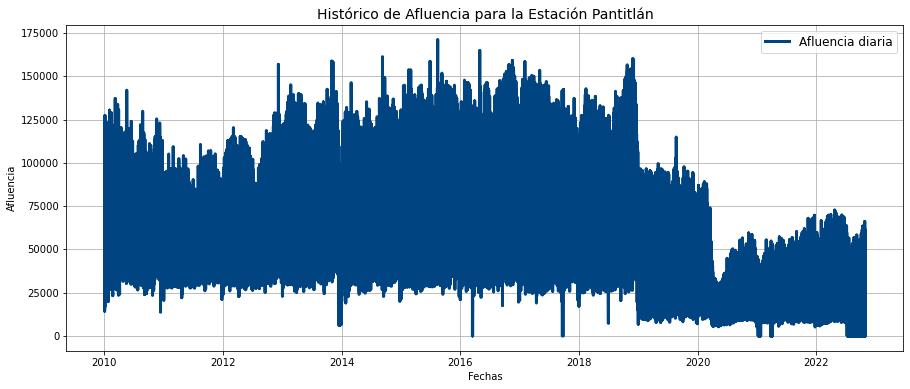

In [12]:
afluencia2 = afluencia.set_index('fecha')
plt.figure(figsize=(15,6))
plt.plot(afluencia2[afluencia2['estacion'].str.contains('Pantitl')]['afluencia'],color='#004481',linewidth=3)
plt.xlabel('Fechas')
plt.ylabel('Afluencia')
plt.title('Histórico de Afluencia para la Estación Pantitlán',fontsize=14)
plt.legend(('Afluencia diaria','a'),prop={'size':12},loc = 'best')
plt.grid(True)

Indios Verdes es otra de las Estaciones con más afluencia:

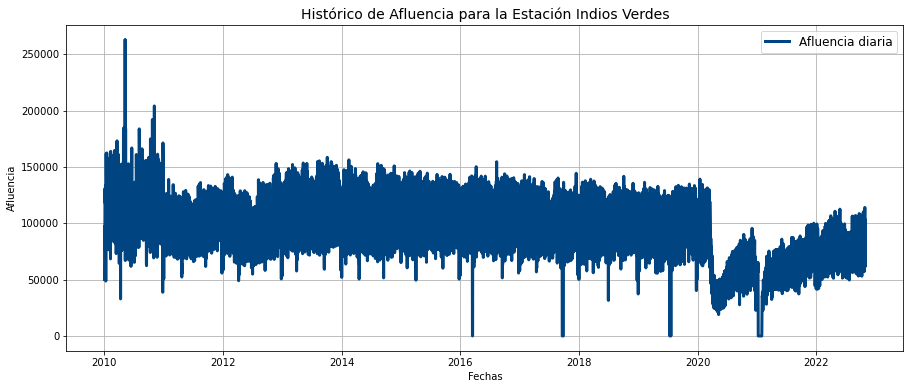

In [13]:
afluencia2 = afluencia.set_index('fecha')
plt.figure(figsize=(15,6))
plt.plot(afluencia2[afluencia2['estacion'].str.contains('Indios')]['afluencia'],color='#004481',linewidth=3)
plt.xlabel('Fechas')
plt.ylabel('Afluencia')
plt.title('Histórico de Afluencia para la Estación Indios Verdes',fontsize=14)
plt.legend(('Afluencia diaria','a'),prop={'size':12},loc = 'best')
plt.grid(True)

Observemos que Pantitlán por ejemplo es una de las estaciones que históricamente ha tenido mayor afluencia de personas, también podemos notar que antes de la pandemia, la concentración de personas era mucho mayor, que post-Covid. Esto nos lleva a preguntarnos como integrar esta información en nuestros datos dado que históricamente cada estación tiene una afluencia distinta. Lo más sencillo es cortar nuestra información a partir de mediados 2021 donde la movilidad empieza a estabilizarse debido a que la pandemia comienza su desaceleración, de esta manera podemos tomarnos como valor fijo entre nodos la mediana de los datos, para este rango de fechas, siendo este un mejor estimador que la media.
<br>
<br>
Sabemos además que las estaciones con mayores transbordos como lo es pantitlán van a presentar mayor afluencia y esta dependerá de la línea en la que viajen, para fines prácticos de este ejercicio, se asumirá pantitlán como un solo nodo sin importar la línea en la que te encuentras.
<br>
<br>
Supondremos además que la afluencia tiene dirección, es decir si vas en la línea 1 por ejemplo de Pantitlán a Zaragoza, sabemos que la mediana de afluencia en Pantitlán es n, así que la afluencia de Pantitlán a Zaragoza será n, y si la afluencia de Zaragoza es m y su dirección es pantitlán, entonces la afluencia de esa dirección será m.
<br>
<br>
Este quizá sea uno de los supuestos más grandes al integrar esta matriz al modelo, pues estamos haciendo el supuesto de que la cantidad de personas que se reportan entran a una estación permanecen en la siguiente, cuando sabemos que en la realidad esto no necesariamente es cierto, pues si n personas suben en Pantitlán, tienen muchas opciones para moverse, ya que esa estación tiene 4 transbordos, es decir, 4 líneas contiguas, su siguiente opción puede ser Zaragoza, Agrícola Oriental, Puebla o Hangares, sin embargo, al no contar con este nivel de detalle en bases públicas, abordaremos este problema de la siguiente forma:
<br>
<br>
1.	Una opción de matriz será bajo el supuesto de que las personas que entran a x estación permanecen en la siguiente.
<br>
<br>
2.	Dado que cada estación tiene una afluencia diferente, se desarrollará una segunda matriz que contemple tanto las distancias previamente desarrolladas, como la proporción de afluencia de cada estación. Dicha proporción será considera de acuerdo a líneas completas, es decir, si la línea 1 tiene una afluencia total z, entonces cada una de sus estaciones tendrá un peso distinto de acuerdo a su afluencia individual, n/z.
<br>
<br>
Adicional a lo anterior no estamos considerando horarios, la afluencia es el número de personas totales al día, sin considerar que en horarios 6-9 am o 6-9 pm, son horarios de mucho mayor cocentración de personas por las horas laborales entre semana y varian bastante los fines de semana.

Antes de determinar la mediana general por estación, recordemos que el rango de fechas que estamos considerando es a partir de mediados de 2021, sin embargo, para una estación en particular: línea 12, sufrió un incidente en mayo 2021, dejándola fuera de servicio a partir de ese periodo, podemos observar en el siguiente gráfico como se ve su comportamiento de afluencia histórica. Con fines de no sacarla de nuestro análisis, pues contamos con su matriz de distancias, decidimos tomar un periodo distinto únicamente para esta línea, que contemple el mismo número de periodos (16) y que no se intersecte con la pandemia: mediados de junio 2018 a 2020.

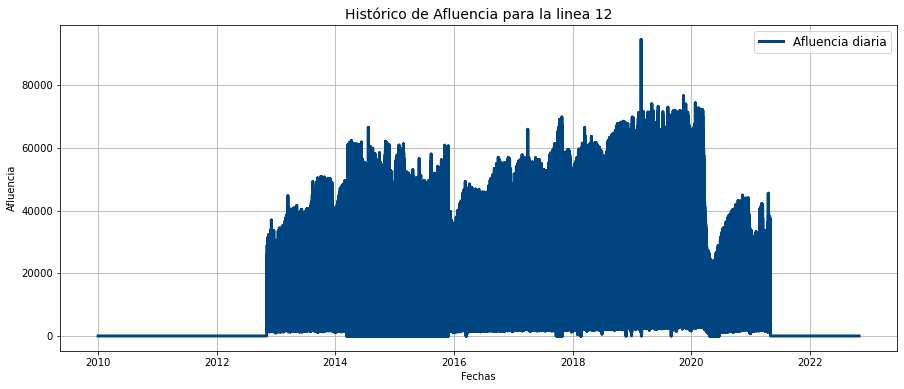

In [14]:
afluencia2 = afluencia.set_index('fecha')
plt.figure(figsize=(15,6))
plt.plot(afluencia2[afluencia2['linea'].str.contains('12')]['afluencia'],color='#004481',linewidth=3)
plt.xlabel('Fechas')
plt.ylabel('Afluencia')
plt.title('Histórico de Afluencia para la linea 12',fontsize=14)
plt.legend(('Afluencia diaria','a'),prop={'size':12},loc = 'best')
plt.grid(True)

A continuación se muestra la obtención de la mediana considerando las especificaciones anteriores, bajo este supuesto la estación con mayor afluencia es Indios verdes:

In [15]:
# Se modifican rangos de Fechas
a = pd.DataFrame(afluencia[(afluencia['fecha']>='2021-06-01')&(afluencia['linea']!='Linea 12')])
b = pd.DataFrame(afluencia[(afluencia['fecha']>='2018-06-01')&(afluencia['fecha']<='2020-10-31')
                           &(afluencia['linea']=='Linea 12')])
NuevosRangosFechas = pd.concat([a,b])

In [16]:
#Filtrando el Data set a partir de 2021 a la fecha
median_afluencia = NuevosRangosFechas\
.groupby(['estacion'])['afluencia'].median().sort_values(ascending=False).reset_index()
median_afluencia.head(15)

estacion  afluencia
0         IndiosVerdes    83484.5
1   Constitucionde1917    75500.5
2              Tlahuac    58463.5
3             Tasquena    55844.5
4        CuatroCaminos    51137.0
5       InsurgentesSur    41064.5
6           Buenavista    39819.0
7         Observatorio    37927.0
8         CiudadAzteca    36665.0
9          Universidad    35232.0
10               LaPaz    33931.5
11           Pantitlan    33291.5
12        Chilpancingo    33177.0
13   PerifericoOriente    32828.5
14              Merced    31735.5

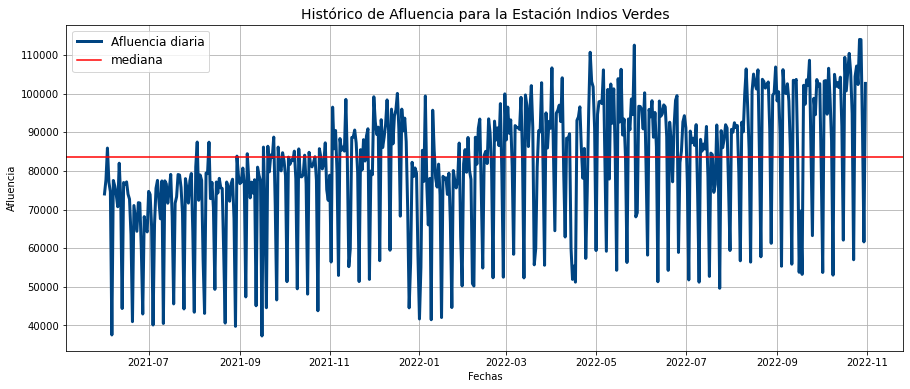

In [17]:
afluencia2 = afluencia.set_index('fecha')
plt.figure(figsize=(15,6))
plt.plot(afluencia2[(afluencia2.index>='2021-06-01')&(afluencia2['estacion'].str.contains('Indios'))]['afluencia'],color='#004481',linewidth=3)
plt.xlabel('Fechas')
plt.ylabel('Afluencia')
plt.title('Histórico de Afluencia para la Estación Indios Verdes',fontsize=14)
plt.axhline(median_afluencia[median_afluencia['estacion'].str.contains('Indios')]['afluencia'].values[0],color='red')
plt.legend(('Afluencia diaria','mediana'),prop={'size':12},loc = 'best')
plt.grid(True)

In [18]:
#Data Frame inicial de relación:
Union_data = metro1.merge(median_afluencia,left_on='Estacion1', right_on='estacion',how='left')
Union_data = Union_data.rename(columns={'estacion':'estacionA','afluencia':'afluenciaA'})
Union_data = Union_data.merge(median_afluencia,left_on='Estacion2', right_on='estacion',how='left')
Union_data = Union_data.rename(columns={'estacion':'estacionB','afluencia':'afluenciaB'})
aux = Union_data.groupby('Linea')['afluenciaA'].sum().to_frame().rename(columns={'afluenciaA':'AfluenciaInteraccion'}).reset_index()
Union_data = Union_data.merge(aux,on='Linea',how='left')
Union_data['PropAfluenciaA']=Union_data['afluenciaA']/Union_data['AfluenciaInteraccion']
Union_data['PropAfluenciaB']=Union_data['afluenciaB']/Union_data['AfluenciaInteraccion']
Union_data = Union_data[['Linea','estacionA','afluenciaA','estacionB','afluenciaB',
                         'AfluenciaInteraccion','PropAfluenciaA','PropAfluenciaB']]
Union_data.head(10)

Linea             estacionA  afluenciaA             estacionB  afluenciaB  AfluenciaInteraccion  PropAfluenciaA  PropAfluenciaB
0     1             Pantitlan     33291.5              Zaragoza     28184.0              340306.0        0.097828        0.082820
1     1              Zaragoza     28184.0           GomezFarias     23083.5              340306.0        0.082820        0.067832
2     1           GomezFarias     23083.5  BoulevardPuertoAereo     12290.5              340306.0        0.067832        0.036116
3     1  BoulevardPuertoAereo     12290.5              Balbuena      7115.0              340306.0        0.036116        0.020908
4     1              Balbuena      7115.0             Moctezuma     13997.5              340306.0        0.020908        0.041132
5     1             Moctezuma     13997.5             SanLazaro     12877.0              340306.0        0.041132        0.037839
6     1             SanLazaro     12877.0            Candelaria      8674.5              340306.0        0.037839        0.025490
7     1            Candelaria      8674.5                Merced     31735.5              340306.0        0.025490        0.093256
8     1                Merced     31735.5            PinoSuarez     15539.5              340306.0        0.093256        0.045663
9     1            PinoSuarez     15539.5      IsabellaCatolica     15061.5              340306.0        0.045663        0.044259

In [19]:
matriz_afluenciaA = construye_matriz_adyacencias("estacionA","estacionB","afluenciaA",N=N,nodos=nodos1,base=Union_data)
matriz_afluenciaA=np.transpose(matriz_afluenciaA)
matriz_afluenciaB = construye_matriz_adyacencias("estacionA","estacionB","afluenciaB",N=N,nodos=nodos1,base=Union_data)
matriz_afluenciafinal = matriz_afluenciaA+matriz_afluenciaB

In [20]:
matriz_afluenciaAprop = construye_matriz_adyacencias("estacionA","estacionB","PropAfluenciaA",N=N,nodos=nodos1,base=Union_data)
matriz_afluenciaAprop=np.transpose(matriz_afluenciaAprop)
matriz_afluenciaBprop = construye_matriz_adyacencias("estacionA","estacionB","PropAfluenciaB",N=N,nodos=nodos1,base=Union_data)
matriz_afluenciafinalprop = matriz_afluenciaAprop+matriz_afluenciaBprop

In [21]:
matriz_afluenciafinal

Pantitlan  Zaragoza  GomezFarias  BoulevardPuertoAereo  Balbuena  Moctezuma  SanLazaro  Candelaria   Merced  PinoSuarez  IsabellaCatolica  SaltodelAgua  Balderas  Cuauhtemoc  Insurgentes  Sevilla  Chapultepec  Juanacatlan  Tacubaya  CuatroCaminos  Panteones   Tacuba  Cuitlahuac  Popotla  ColegioMilitar   Normal  SanCosme  Revolucion  Hidalgo  BellasArtes  Allende   Zocalo  SanAntonioAbad  Chabacano  Viaducto     Xola  VilladeCortes  Nativitas  Portales   Ermita  \
Pantitlan                             0.0   33291.5          0.0                   0.0       0.0        0.0        0.0         0.0      0.0         0.0               0.0           0.0       0.0         0.0          0.0      0.0          0.0          0.0       0.0            0.0        0.0      0.0         0.0      0.0             0.0      0.0       0.0         0.0      0.0          0.0      0.0      0.0             0.0        0.0       0.0      0.0            0.0        0.0       0.0      0.0   
Zaragoza                          28184.0       0.0      28184.0                   0.0       0.0        0.0        0.0         0.0      0.0         0.0               0.0           0.0       0.0         0.0          0.0      0.0          0.0          0.0       0.0            0.0        0.0      0.0         0.0      0.0             0.0      0.0       0.0         0.0      0.0          0.0      0.0      0.0             0.0        0.0       0.0      0.0            0.0        0.0       0.0      0.0   
GomezFarias                           0.0   23083.5          0.0               23083.5       0.0        0.0        0.0         0.0      0.0         0.0               0.0           0.0       0.0         0.0          0.0      0.0          0.0          0.0       0.0            0.0        0.0      0.0         0.0      0.0             0.0      0.0       0.0         0.0      0.0          0.0      0.0      0.0             0.0        0.0       0.0      0.0            0.0        0.0       0.0      0.0   
BoulevardPuertoAereo                  0.0       0.0      12290.5                   0.0   12290.5        0.0        0.0         0.0      0.0         0.0               0.0           0.0       0.0         0.0          0.0      0.0          0.0          0.0       0.0            0.0        0.0      0.0         0.0      0.0             0.0      0.0       0.0         0.0      0.0          0.0      0.0      0.0             0.0        0.0       0.0      0.0            0.0        0.0       0.0      0.0   
Balbuena                              0.0       0.0          0.0                7115.0       0.0     7115.0        0.0         0.0      0.0         0.0               0.0           0.0       0.0         0.0          0.0      0.0          0.0          0.0       0.0            0.0        0.0      0.0         0.0      0.0             0.0      0.0       0.0         0.0      0.0          0.0      0.0      0.0             0.0        0.0       0.0      0.0            0.0        0.0       0.0      0.0   
Moctezuma                             0.0       0.0          0.0                   0.0   13997.5        0.0    13997.5         0.0      0.0         0.0               0.0           0.0       0.0         0.0          0.0      0.0          0.0          0.0       0.0            0.0        0.0      0.0         0.0      0.0             0.0      0.0       0.0         0.0      0.0          0.0      0.0      0.0             0.0        0.0       0.0      0.0            0.0        0.0       0.0      0.0   
SanLazaro                             0.0       0.0          0.0                   0.0       0.0    12877.0        0.0     12877.0      0.0         0.0               0.0           0.0       0.0         0.0          0.0      0.0          0.0          0.0       0.0            0.0        0.0      0.0         0.0      0.0             0.0      0.0       0.0         0.0      0.0          0.0      0.0      0.0             0.0        0.0       0.0      0.0            0.0        0.0       0.0      0.0   
Candelaria              

In [22]:
matriz_afluenciafinalprop

Pantitlan  Zaragoza  GomezFarias  BoulevardPuertoAereo  Balbuena  Moctezuma  SanLazaro  Candelaria    Merced  PinoSuarez  IsabellaCatolica  SaltodelAgua  Balderas  Cuauhtemoc  Insurgentes   Sevilla  Chapultepec  Juanacatlan  Tacubaya  CuatroCaminos  Panteones    Tacuba  Cuitlahuac   Popotla  ColegioMilitar    Normal  SanCosme  Revolucion   Hidalgo  BellasArtes   Allende    Zocalo  SanAntonioAbad  Chabacano  Viaducto      Xola  VilladeCortes  Nativitas  Portales  \
Pantitlan                        0.000000  0.097828     0.000000              0.000000  0.000000   0.000000   0.000000    0.000000  0.000000    0.000000          0.000000      0.000000  0.000000    0.000000     0.000000  0.000000     0.000000     0.000000  0.000000       0.000000   0.000000  0.000000    0.000000  0.000000        0.000000  0.000000  0.000000    0.000000  0.000000     0.000000  0.000000  0.000000        0.000000   0.000000  0.000000  0.000000       0.000000   0.000000  0.000000   
Zaragoza                         0.082820  0.000000     0.082820              0.000000  0.000000   0.000000   0.000000    0.000000  0.000000    0.000000          0.000000      0.000000  0.000000    0.000000     0.000000  0.000000     0.000000     0.000000  0.000000       0.000000   0.000000  0.000000    0.000000  0.000000        0.000000  0.000000  0.000000    0.000000  0.000000     0.000000  0.000000  0.000000        0.000000   0.000000  0.000000  0.000000       0.000000   0.000000  0.000000   
GomezFarias                      0.000000  0.067832     0.000000              0.067832  0.000000   0.000000   0.000000    0.000000  0.000000    0.000000          0.000000      0.000000  0.000000    0.000000     0.000000  0.000000     0.000000     0.000000  0.000000       0.000000   0.000000  0.000000    0.000000  0.000000        0.000000  0.000000  0.000000    0.000000  0.000000     0.000000  0.000000  0.000000        0.000000   0.000000  0.000000  0.000000       0.000000   0.000000  0.000000   
BoulevardPuertoAereo             0.000000  0.000000     0.036116              0.000000  0.036116   0.000000   0.000000    0.000000  0.000000    0.000000          0.000000      0.000000  0.000000    0.000000     0.000000  0.000000     0.000000     0.000000  0.000000       0.000000   0.000000  0.000000    0.000000  0.000000        0.000000  0.000000  0.000000    0.000000  0.000000     0.000000  0.000000  0.000000        0.000000   0.000000  0.000000  0.000000       0.000000   0.000000  0.000000   
Balbuena                         0.000000  0.000000     0.000000              0.020908  0.000000   0.020908   0.000000    0.000000  0.000000    0.000000          0.000000      0.000000  0.000000    0.000000     0.000000  0.000000     0.000000     0.000000  0.000000       0.000000   0.000000  0.000000    0.000000  0.000000        0.000000  0.000000  0.000000    0.000000  0.000000     0.000000  0.000000  0.000000        0.000000   0.000000  0.000000  0.000000       0.000000   0.000000  0.000000   
Moctezuma                        0.000000  0.000000     0.000000              0.000000  0.041132   0.000000   0.041132    0.000000  0.000000    0.000000          0.000000      0.000000  0.000000    0.000000     0.000000  0.000000     0.000000     0.000000  0.000000       0.000000   0.000000  0.000000    0.000000  0.000000        0.000000  0.000000  0.000000    0.000000  0.000000     0.000000  0.000000  0.000000        0.000000   0.000000  0.000000  0.000000       0.000000   0.000000  0.000000   
SanLazaro                        0.000000  0.000000     0.000000              0.000000  0.000000   0.037839   0.000000    0.037839  0.000000    0.000000          0.000000      0.000000  0.000000    0.000000     0.000000  0.000000     0.000000     0.000000  0.000000       0.000000   0.000000  0.000000    0.000000  0.000000        0.000000  0.000000  0.000000    0.000000  0.000000     0.000000  0.000000  0.000000        0.000000   0.000000  0.000000  0.000000       0.000000   0.000000  0.000000   
Candelaria              

In [23]:
matrizInteraccion_dist_afluen = np.multiply(adyacencia1, matriz_afluenciafinalprop)

In [24]:
matrizInteraccion_dist_afluen

Pantitlan    Zaragoza  GomezFarias  BoulevardPuertoAereo   Balbuena  Moctezuma  SanLazaro  Candelaria     Merced  PinoSuarez  IsabellaCatolica  SaltodelAgua   Balderas  Cuauhtemoc  Insurgentes    Sevilla  Chapultepec  Juanacatlan    Tacubaya  CuatroCaminos   Panteones      Tacuba  Cuitlahuac    Popotla  ColegioMilitar     Normal   SanCosme  Revolucion    Hidalgo  BellasArtes    Allende     Zocalo  SanAntonioAbad  Chabacano   Viaducto       Xola  VilladeCortes  \
Pantitlan                         0.000000  129.133133     0.000000              0.000000   0.000000   0.000000   0.000000    0.000000   0.000000    0.000000          0.000000      0.000000   0.000000    0.000000     0.000000   0.000000     0.000000     0.000000    0.000000       0.000000    0.000000    0.000000    0.000000   0.000000        0.000000   0.000000   0.000000    0.000000   0.000000     0.000000   0.000000   0.000000        0.000000   0.000000   0.000000   0.000000       0.000000   
Zaragoza                        109.321846    0.000000    63.108520              0.000000   0.000000   0.000000   0.000000    0.000000   0.000000    0.000000          0.000000      0.000000   0.000000    0.000000     0.000000   0.000000     0.000000     0.000000    0.000000       0.000000    0.000000    0.000000    0.000000   0.000000        0.000000   0.000000   0.000000    0.000000   0.000000     0.000000   0.000000   0.000000        0.000000   0.000000   0.000000   0.000000       0.000000   
GomezFarias                       0.000000   51.687678     0.000000             41.445107   0.000000   0.000000   0.000000    0.000000   0.000000    0.000000          0.000000      0.000000   0.000000    0.000000     0.000000   0.000000     0.000000     0.000000    0.000000       0.000000    0.000000    0.000000    0.000000   0.000000        0.000000   0.000000   0.000000    0.000000   0.000000     0.000000   0.000000   0.000000        0.000000   0.000000   0.000000   0.000000       0.000000   
BoulevardPuertoAereo              0.000000    0.000000    22.066891              0.000000  21.489035   0.000000   0.000000    0.000000   0.000000    0.000000          0.000000      0.000000   0.000000    0.000000     0.000000   0.000000     0.000000     0.000000    0.000000       0.000000    0.000000    0.000000    0.000000   0.000000        0.000000   0.000000   0.000000    0.000000   0.000000     0.000000   0.000000   0.000000        0.000000   0.000000   0.000000   0.000000       0.000000   
Balbuena                          0.000000    0.000000     0.000000             12.440054   0.000000  14.698081   0.000000    0.000000   0.000000    0.000000          0.000000      0.000000   0.000000    0.000000     0.000000   0.000000     0.000000     0.000000    0.000000       0.000000    0.000000    0.000000    0.000000   0.000000        0.000000   0.000000   0.000000    0.000000   0.000000     0.000000   0.000000   0.000000        0.000000   0.000000   0.000000   0.000000       0.000000   
Moctezuma                         0.000000    0.000000     0.000000              0.000000  28.915865   0.000000  19.661143    0.000000   0.000000    0.000000          0.000000      0.000000   0.000000    0.000000     0.000000   0.000000     0.000000     0.000000    0.000000       0.000000    0.000000    0.000000    0.000000   0.000000        0.000000   0.000000   0.000000    0.000000   0.000000     0.000000   0.000000   0.000000        0.000000   0.000000   0.000000   0.000000       0.000000   
SanLazaro                         0.000000    0.000000     0.000000              0.000000   0.000000  18.087269   0.000000   32.768984   0.000000    0.000000          0.000000      0.000000   0.000000    0.000000     0.000000   0.000000     0.000000     0.000000    0.000000       0.000000    0.000000    0.000000    0.000000   0.000000        0.000000   0.000000   0.000000    0.000000   0.000000     0.000000   0.000000   0.000000        0.000000   0.000000   0.000000   0.000000       0.000000   
Candelaria                       

In [25]:
adyacencia1.to_csv('Matrices/MatrizAdyacencia.csv')
matriz_afluenciafinal.to_csv('Matrices/MatrizAfluencia.csv')
matrizInteraccion_dist_afluen.to_csv('Matrices/matrizInteraccion_dist_afluen.csv')
matriz_afluenciafinalprop.to_csv('Matrices/matrizmatriz_afluenciafinalprop.csv')


In [26]:
# matriz_afluencia_a = pd.read_csv('Matrices/Matriz1Pesosgrandes.csv').set_index('Unnamed: 0')
# matriz_afluencia_b = pd.read_csv('Matrices/Matriz1Pesospequeños.csv').set_index('Unnamed: 0')

# Algoritmo dijkstra

In [27]:
algoritmo_dijkstra(adyacencia1,'Pantitlan','Tacubaya')

['Pantitlan',
 'Puebla',
 'CiudadDeportiva',
 'Velodromo',
 'Mixiuhca',
 'Jamaica',
 'Chabacano',
 'LazaroCardenas',
 'CentroMedico',
 'Chilpancingo',
 'Patriotismo',
 'Tacubaya']

In [28]:
algoritmo_dijkstra(matriz_afluenciafinal,'Pantitlan','Tacubaya')

['Pantitlan',
 'Hangares',
 'TerminalAerea',
 'Oceania',
 'RomeroRubio',
 'RicardoFloresMagon',
 'SanLazaro',
 'Candelaria',
 'FrayServando',
 'Jamaica',
 'Chabacano',
 'LazaroCardenas',
 'CentroMedico',
 'Chilpancingo',
 'Patriotismo',
 'Tacubaya']

In [29]:
algoritmo_dijkstra(matrizInteraccion_dist_afluen,'Pantitlan','Tacubaya')

['Pantitlan',
 'Zaragoza',
 'GomezFarias',
 'BoulevardPuertoAereo',
 'Balbuena',
 'Moctezuma',
 'SanLazaro',
 'Candelaria',
 'Merced',
 'PinoSuarez',
 'IsabellaCatolica',
 'SaltodelAgua',
 'Balderas',
 'Cuauhtemoc',
 'Insurgentes',
 'Sevilla',
 'Chapultepec',
 'Juanacatlan',
 'Tacubaya']